# Máquina de chicles

Ejemplifica la creación de un autómata finito no determinístico

In [1]:
import os
import sys

In [2]:
from maquinas.regular.ndfa import NonDeterministicFiniteAutomaton as NDFA
from maquinas.regular.ndfa_e import NonDeterministicFiniteAutomaton_epsilon as NDFA_e
from maquinas.regular.ndfa_e import epsilon
from maquinas.simulation import Simulation

In [3]:
# Creating automata finito no deterministico
chicles=NDFA(Q=['q_0',
                  'q1_11','q1_21','q1_31','q1_41',
                  'q2_11','q2_11_12',
                  'q3_11','q3_11_12','q3_21_12',
                  'q4_11','q4_21','q4_21_12',
                  'q5_11','q5_21','q5_31',
                  'q6_12','q6_22',
                  'q7_12','q7_11_12',
                  'q8_12','q8_11_12','q8_21_12',
                  'q_5'
                 ],
                         sigma=['1','2','5'],
                         q_0='q_0',
                         A=['q_5'],
                         delta=[
                            (('q_0','1'),['q1_11','q2_11','q3_11','q4_11','q5_11']),
                            (('q_0','2'),['q6_12','q7_12','q8_12']),
                            (('q_0','5'),['q_5']),
                            (('q1_11','1'),['q1_21']),
                            (('q1_21','1'),['q1_31']),
                            (('q1_31','1'),['q1_41']),
                            (('q1_41','1'),['q_5']),
                            (('q2_11','2'),['q2_11_12']),
                            (('q2_11_12','2'),['q_5']),
                            (('q3_11','2'),['q3_11_12']),
                            (('q3_11_12','1'),['q3_21_12']),
                            (('q3_21_12','1'),['q_5']),
                            (('q4_11','1'),['q4_21']),
                            (('q4_21','2'),['q4_21_12']),
                            (('q4_21_12','1'),['q_5']),
                            (('q5_11','1'),['q5_21']),
                            (('q5_21','1'),['q5_31']),
                            (('q5_31','2'),['q_5']),
                            (('q6_12','2'),['q6_22']),
                            (('q6_22','1'),['q_5']),
                            (('q7_12','1'),['q7_11_12']),
                            (('q7_11_12','2'),['q_5']),
                            (('q8_12','1'),['q8_11_12']),
                            (('q8_11_12','1'),['q8_21_12']),
                            (('q8_21_12','1'),['q_5']),                          
                         ])

In [4]:
print(chicles.summary())

States  : q_0, q1_11, q1_21, q1_31, q1_41, q2_11, q2_11_12, q3_11, q3_11_12, q3_21_12, q4_11, q4_21, q4_21_12, q5_11, q5_21, q5_31, q6_12, q6_22, q7_12, q7_11_12, q8_12, q8_11_12, q8_21_12, q_5
Sigma   : 1, 2, 5
Initial : q_0
Aceptors: q_5
Transitions:
 q_0,1 → ('q1_11', 'q4_11', 'q5_11', 'q3_11', 'q2_11')
 q_0,2 → ('q8_12', 'q7_12', 'q6_12')
 q_0,5 → ('q_5',)
 q1_11,1 → ('q1_21',)
 q1_21,1 → ('q1_31',)
 q1_31,1 → ('q1_41',)
 q1_41,1 → ('q_5',)
 q2_11,2 → ('q2_11_12',)
 q2_11_12,2 → ('q_5',)
 q3_11,2 → ('q3_11_12',)
 q3_11_12,1 → ('q3_21_12',)
 q3_21_12,1 → ('q_5',)
 q4_11,1 → ('q4_21',)
 q4_21,2 → ('q4_21_12',)
 q4_21_12,1 → ('q_5',)
 q5_11,1 → ('q5_21',)
 q5_21,1 → ('q5_31',)
 q5_31,2 → ('q_5',)
 q6_12,2 → ('q6_22',)
 q6_22,1 → ('q_5',)
 q7_12,1 → ('q7_11_12',)
 q7_11_12,2 → ('q_5',)
 q8_12,1 → ('q8_11_12',)
 q8_11_12,1 → ('q8_21_12',)
 q8_21_12,1 → ('q_5',)


In [5]:
for q,a,w_ in chicles.delta_stepwise("2111"):
    if a:
        print(f"{a} -> {q}", end=", ")
    else:
        print(f"{q}",end=", ")
    res=q
    
print(f"\nCon {res} Se acepta?", "Sí" if chicles.accept(res) else "No" )

{'q_0'}, 2 -> {'q8_12', 'q7_12', 'q6_12'}, 1 -> {'q8_11_12', 'q7_11_12'}, 1 -> {'q8_21_12'}, 1 -> {'q_5'}, 
Con {'q_5'} Se acepta? Sí


In [6]:
res=chicles.delta_extended(None,"212")
print(f"Con {res} Se acepta?", "Sí" if chicles.accept(res) else "No" )

Con {'q_5'} Se acepta? Sí


In [7]:
s=Simulation(chicles,"11111")
s.run()

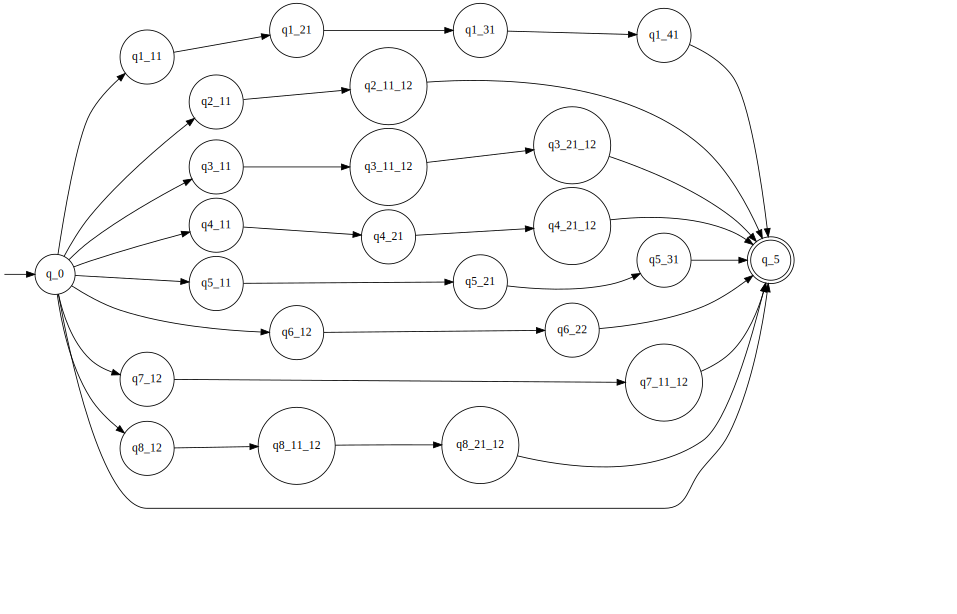

In [8]:
chicles.graph(symbols={'1':'💰','2':'💰\n💰','5':'💰\n💰\n💰\n💰\n💰'})

In [9]:
chicles.table()

,1,2,5
q1_11,q1_21,∅,∅
q1_21,q1_31,∅,∅
q1_31,q1_41,∅,∅
q1_41,q_5,∅,∅
q2_11,∅,q2_11_12,∅
q2_11_12,∅,q_5,∅
q3_11,∅,q3_11_12,∅
q3_11_12,q3_21_12,∅,∅
q3_21_12,q_5,∅,∅
q4_11,q4_21,∅,∅


In [10]:
# Creating automata finito no deterministico
chicles=NDFA_e(Q=['q_0',
                  'q1_11','q1_21','q1_31','q1_41',
                  'q2_11','q2_11_12',
                  'q3_11','q3_11_12','q3_21_12',
                  'q4_11','q4_21','q4_21_12',
                  'q5_11','q5_21','q5_31',
                  'q6_12','q6_22',
                  'q7_12','q7_11_12',
                  'q8_12','q8_11_12','q8_21_12',
                  'q_5'
                 ],
                         sigma=['1','2','5'],
                         q_0='q_0',
                         A=['q_5'],
                         delta=[
                            (('q_0','1'),['q1_11','q2_11','q3_11','q4_11','q5_11']),
                            (('q_0','2'),['q6_12','q7_12','q8_12']),
                            (('q_0','5'),['q_5']),
                            (('q1_11','1'),['q1_21']),
                            (('q1_21','1'),['q1_31']),
                            (('q1_31','1'),['q1_41']),
                            (('q1_41','1'),['q_5']),
                            (('q2_11','2'),['q2_11_12']),
                            (('q2_11_12','2'),['q_5']),
                            (('q3_11','2'),['q3_11_12']),
                            (('q3_11_12','1'),['q3_21_12']),
                            (('q3_21_12','1'),['q_5']),
                            (('q4_11','1'),['q4_21']),
                            (('q4_21','2'),['q4_21_12']),
                            (('q4_21_12','1'),['q_5']),
                            (('q5_11','1'),['q5_21']),
                            (('q5_21','1'),['q5_31']),
                            (('q5_31','2'),['q_5']),
                            (('q6_12','2'),['q6_22']),
                            (('q6_22','1'),['q_5']),
                            (('q7_12','1'),['q7_11_12']),
                            (('q7_11_12','2'),['q_5']),
                            (('q8_12','1'),['q8_11_12']),
                            (('q8_11_12','1'),['q8_21_12']),
                            (('q8_21_12','1'),['q_5']),
                            (('q_5',epsilon),['q_0'])
                         ])


In [11]:
print(chicles.summary())

States  : q_0, q1_11, q1_21, q1_31, q1_41, q2_11, q2_11_12, q3_11, q3_11_12, q3_21_12, q4_11, q4_21, q4_21_12, q5_11, q5_21, q5_31, q6_12, q6_22, q7_12, q7_11_12, q8_12, q8_11_12, q8_21_12, q_5
Sigma   : ε, 1, 2, 5
Initial : q_0
Aceptors: q_5
Transitions:
 q_0,1 → ('q1_11', 'q4_11', 'q5_11', 'q3_11', 'q2_11')
 q_0,2 → ('q8_12', 'q7_12', 'q6_12')
 q_0,5 → ('q_5',)
 q1_11,1 → ('q1_21',)
 q1_21,1 → ('q1_31',)
 q1_31,1 → ('q1_41',)
 q1_41,1 → ('q_5',)
 q2_11,2 → ('q2_11_12',)
 q2_11_12,2 → ('q_5',)
 q3_11,2 → ('q3_11_12',)
 q3_11_12,1 → ('q3_21_12',)
 q3_21_12,1 → ('q_5',)
 q4_11,1 → ('q4_21',)
 q4_21,2 → ('q4_21_12',)
 q4_21_12,1 → ('q_5',)
 q5_11,1 → ('q5_21',)
 q5_21,1 → ('q5_31',)
 q5_31,2 → ('q_5',)
 q6_12,2 → ('q6_22',)
 q6_22,1 → ('q_5',)
 q7_12,1 → ('q7_11_12',)
 q7_11_12,2 → ('q_5',)
 q8_12,1 → ('q8_11_12',)
 q8_11_12,1 → ('q8_21_12',)
 q8_21_12,1 → ('q_5',)
 q_5,ε → ('q_0',)


In [12]:
for qs,a,w_ in chicles.delta_stepwise("11111122"):
    if a:
        print(f"{a} -> {qs}", end=", ")
    else:
        print(f"{qs}",end=", ")
    res=qs
    
print(f"\nCon {res} Se acepta?", "Sí" if chicles.accept(res) else "No" )

{'q_0'}, 1 -> {'q1_11', 'q4_11', 'q5_11', 'q3_11', 'q2_11'}, 1 -> {'q4_21', 'q1_21', 'q5_21'}, 1 -> {'q1_31', 'q5_31'}, 1 -> {'q1_41'}, 1 -> {'q_5', 'q_0'}, 1 -> {'q1_11', 'q4_11', 'q5_11', 'q3_11', 'q2_11'}, 2 -> {'q2_11_12', 'q3_11_12'}, 2 -> {'q_5', 'q_0'}, 
Con {'q_5', 'q_0'} Se acepta? Sí


In [13]:
s=Simulation(chicles,"11111221",symbols={'1':'💰','2':'💰\n💰','5':'💰\n💰\n💰\n💰\n💰'})
s.run()

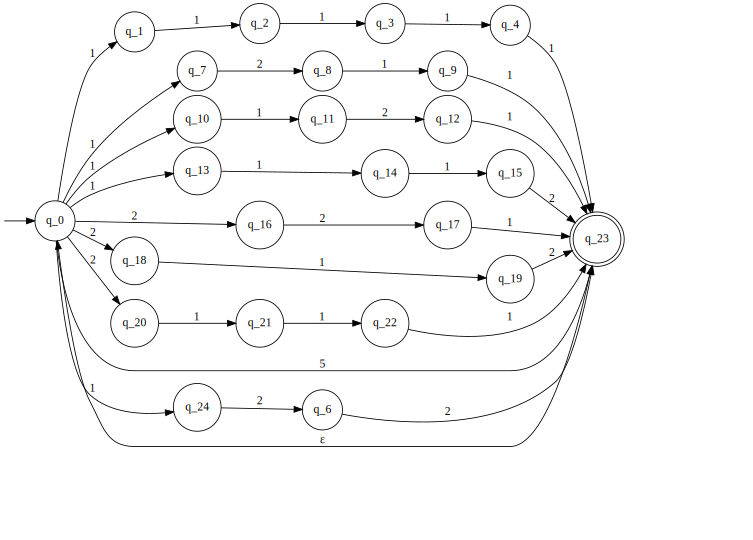

In [14]:
chicles.autorename()
chicles.graph()

In [15]:
chicles.table()

,1,2,5,ε
⟶q_0,"q_24,q_1,q_10,q_7,q_13","q_18,q_20,q_16",q_23,∅
q_1,q_2,∅,∅,∅
q_10,q_11,∅,∅,∅
q_11,∅,q_12,∅,∅
q_12,q_23,∅,∅,∅
q_13,q_14,∅,∅,∅
q_14,q_15,∅,∅,∅
q_15,∅,q_23,∅,∅
q_16,∅,q_17,∅,∅
q_17,q_23,∅,∅,∅


In [16]:
from maquinas.regular.reductions import *

chicles_ndfa=ndfa_e2ndfa(chicles,remove_sink=False)

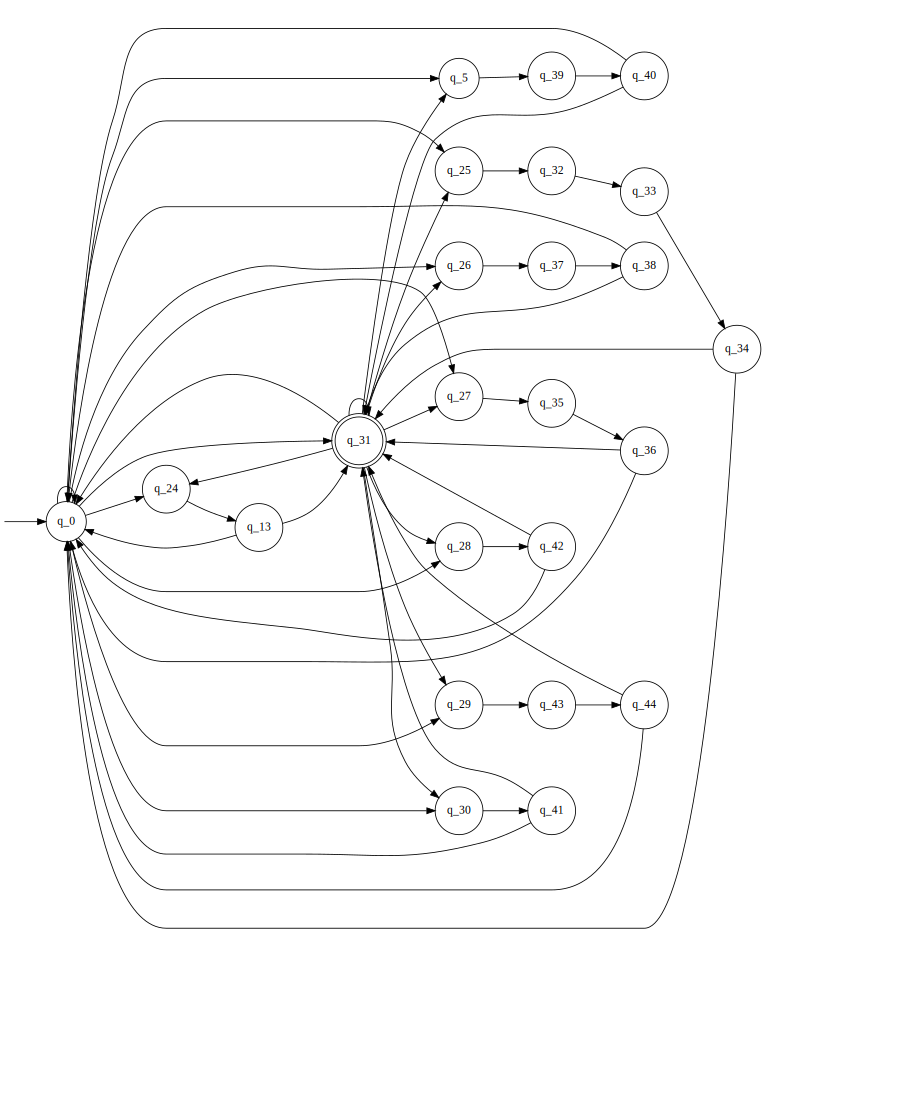

In [17]:
chicles_ndfa.graph(symbols={'1':'💰','2':'💰\n💰','5':'💰\n💰\n💰\n💰\n💰'})

In [18]:
chicles_ndfa.table()

,1,2,5
⟶q_0,"q_24,q_5,q_25,q_27,q_26","q_30,q_29,q_28","q_31,q_0"
q_13,∅,"q_31,q_0",∅
q_24,∅,q_13,∅
q_25,q_32,∅,∅
q_26,q_37,∅,∅
q_27,∅,q_35,∅
q_28,q_42,∅,∅
q_29,q_43,∅,∅
q_30,∅,q_41,∅
q_31,"q_24,q_5,q_25,q_27,q_26","q_30,q_29,q_28","q_31,q_0"


In [19]:
s=Simulation(chicles_ndfa,"11111221",symbols={'1':'💰','2':'💰\n💰','5':'💰\n💰\n💰\n💰\n💰'})
s.run()

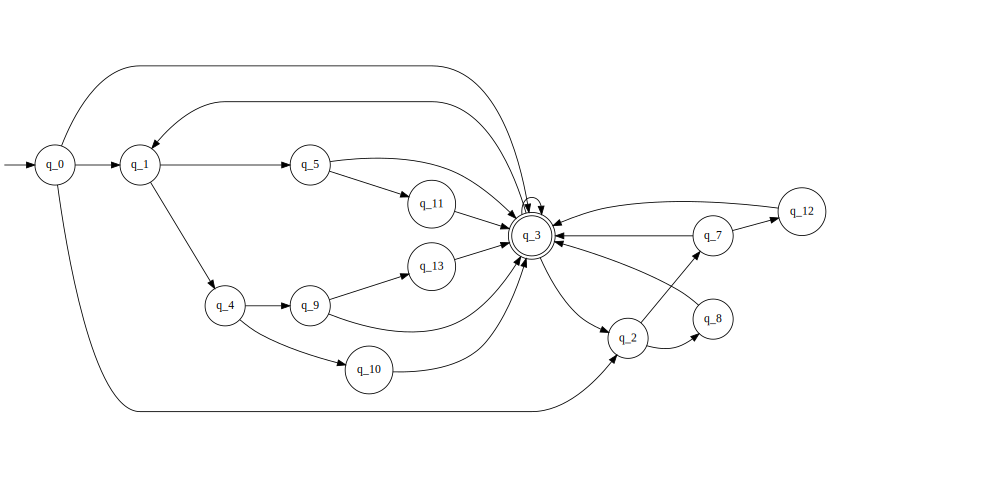

In [20]:
chicles_dfa=ndfa2dfa(chicles_ndfa)
chicles_dfa.graph(symbols={'1':'💰','2':'💰\n💰','5':'💰\n💰\n💰\n💰\n💰'})

In [21]:
chicles_dfa.table()

,1,2,5
⟶q_0,q_1,q_2,q_3
q_1,q_4,q_5,
q_10,q_3,,
q_11,q_3,,
q_12,q_3,,
q_13,q_3,,
q_2,q_7,q_8,
q_3,q_1,q_2,q_3
q_4,q_9,q_10,
q_5,q_11,q_3,


In [22]:
s=Simulation(chicles_dfa,"11111221",symbols={'1':'💰','2':'💰\n💰','5':'💰\n💰\n💰\n💰\n💰'})
s.run()

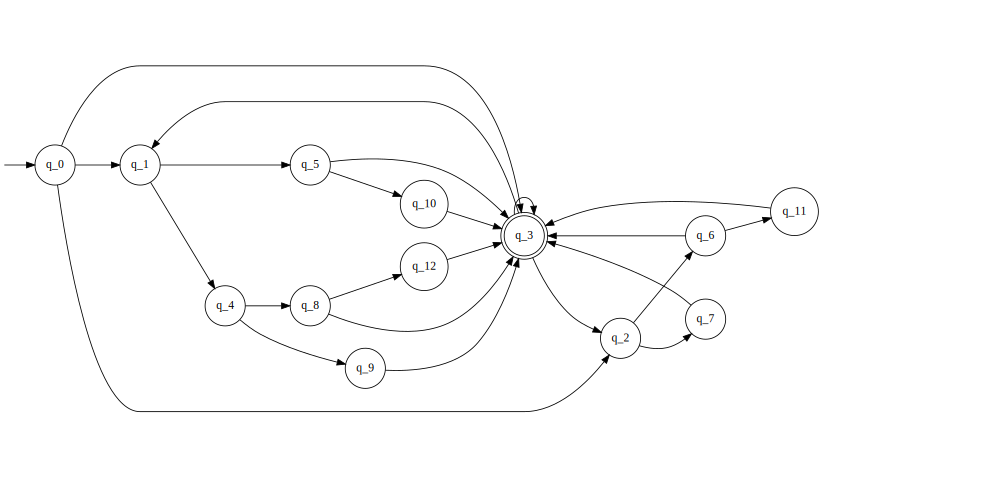

In [23]:
chicles_ndfa_e=dfa2ndfa_e(chicles_dfa)
chicles_ndfa_e.graph(symbols={'1':'💰','2':'💰\n💰','5':'💰\n💰\n💰\n💰\n💰'})

In [24]:
chicles_ndfa_e.table()

,1,2,5,ε
⟶q_0,q_1,q_2,q_3,∅
q_1,q_4,q_5,∅,∅
q_10,q_3,∅,∅,∅
q_11,q_3,∅,∅,∅
q_12,q_3,∅,∅,∅
q_2,q_6,q_7,∅,∅
q_3,q_1,q_2,q_3,∅
q_4,q_8,q_9,∅,∅
q_5,q_10,q_3,∅,∅
q_6,q_11,q_3,∅,∅
